In [113]:
import numpy as np
from qiskit import *
from qiskit.visualization import *

In [114]:
# PassPhrase=[]
n_qubits = 8
indx=0
PassPhrase=""
j=""
alice_random_string = np.random.randint(2, size = n_qubits)
for i in alice_random_string:
    j=str(i)
    PassPhrase = PassPhrase + j
print(PassPhrase)

00000110


In [115]:
from AESencryptfunc import * #import AESencryptfunc module to use functions created for this program
import math #import math module to use function such as ceiling

while(len(PassPhrase)!=16):
    print("Enter in the 16 character passphrase to encrypt your text file ")
    # PassPhrase=input()#takes in user input of char, eg. "Iwanttolearnkung"
    if(len(PassPhrase)<16):#check if less than 16 characters, if so add one space character until 16 chars
        while(len(PassPhrase)!=16):
            PassPhrase=PassPhrase+"\00"
    if(len(PassPhrase)>16):#check if bigger than 16 characters, if so then truncate it to be only 16 chars from [0:16]
        print("Your passphrase was larger than 16, truncating passphrase.")
        PassPhrase=PassPhrase[0:16]

#open plaintext.txt file to read and encrypt
sys.argv[1]="plaintext1.txt"
file=open(sys.argv[1], "r")
message=(file.read())
print("Inside your plaintext message is:\n%s\n" % message)
file.close()
sys.argv[2]="ciphertext.txt"
message=BitVector(textstring=message)
message=message.get_bitvector_in_hex()
replacementptr=0
while(replacementptr<len(message)):
    if(message[replacementptr:replacementptr+2]=='0a'):
        message=message[0:replacementptr]+'0d'+message[replacementptr:len(message)]
        replacementptr=replacementptr+4
    else:
        replacementptr=replacementptr+2

message=BitVector(hexstring=message)
message=message.get_bitvector_in_ascii()
#set up some parameters
start=0#set starting pointer for the part to encrypt of the plaintext
end=0#set ending pointer for the part to encrypt of the plaintex
length=len(message)#check the entire size of the message
loopmsg=0.00#create a decimal value
loopmsg=math.ceil(length/16)+1#use formula to figure how long the message is and how many 16 character segmentss must be encrypted
outputhex=""#setup output message in hex

#need to setup roundkeys here
PassPhrase=BitVector(textstring=PassPhrase)
roundkey1=findroundkey(PassPhrase.get_bitvector_in_hex(),1)
roundkey2=findroundkey(roundkey1,2)
roundkey3=findroundkey(roundkey2,3)
roundkey4=findroundkey(roundkey3,4)
roundkey5=findroundkey(roundkey4,5)
roundkey6=findroundkey(roundkey5,6)
roundkey7=findroundkey(roundkey6,7)
roundkey8=findroundkey(roundkey7,8)
roundkey9=findroundkey(roundkey8,9)
roundkey10=findroundkey(roundkey9,10)
roundkeys=[roundkey1,roundkey2,roundkey3,roundkey4,roundkey5,roundkey6,roundkey7,roundkey8,roundkey9,roundkey10]

#set up FILEOUT to write
FILEOUT = open(sys.argv[2], 'w')

# set up the segement message loop parameters
for y in range(1, loopmsg): # loop to encrypt all segments of the message
    if(end+16<length): #if the end pointer is less than the size of the message, then set the segment to be 16 characters
        plaintextseg = message[start:end + 16]
    else: #or else if the end pointer is equal to or greator than the size of the message
        plaintextseg = message[start:length]
        for z in range(0,((end+16)-length),1): #run a while loop to pad the message segement to become 16 characters, if it is 16 already the loop will not run
            plaintextseg = plaintextseg+"\00"
            #plaintextseg2=BitVector(textstring=plaintextseg)
            #print(plaintextseg2.get_bitvector_in_hex())

    #add round key zero/ find round key one
    bv1 = BitVector(textstring=plaintextseg)
    bv2 = PassPhrase
    resultbv=bv1^bv2
    myhexstring = resultbv.get_bitvector_in_hex()

    for x in range(1, 10):  # loop through 9 rounds
        # sub byte
        myhexstring = resultbv.get_bitvector_in_hex()
        temp1=subbyte(myhexstring)

        # shift rows
        temp2=shiftrow(temp1)

        # mix column
        bv3 = BitVector(hexstring=temp2)
        newbvashex=mixcolumn(bv3)
        newbv=BitVector(hexstring=newbvashex)

        #add roundkey for current round
        bv1 = BitVector(bitlist=newbv)
        bv2 = BitVector(hexstring=roundkeys[x-1])
        resultbv = bv1 ^ bv2
        myhexresult = resultbv.get_bitvector_in_hex()

    #start round 10
    # sub byte round 10
    myhexstring = resultbv.get_bitvector_in_hex()
    temp1=subbyte(myhexstring)

    # shift rows round 10
    temp2=shiftrow(temp1)

    # add round key round 10
    newbv = BitVector(hexstring=temp2)
    bv1 = BitVector(bitlist=newbv)
    bv2 = BitVector(hexstring=roundkeys[9])
    resultbv = bv1 ^ bv2
    myhexstring = resultbv.get_bitvector_in_hex()

    #set encrypted hex segement of message to output string
    outputhextemp = resultbv.get_hex_string_from_bitvector()
    FILEOUT.write(outputhextemp)
    start = start + 16 #increment start pointer
    end = end + 16 #increment end pointer

# encrypted output hex string to specified cipherhex file
FILEOUT.close()

file2=open(sys.argv[2], "r")
print("The output hex value for the entire message is:\n%s\n" % file2.read())
file2.close()

Enter in the 16 character passphrase to encrypt your text file 
Inside your plaintext message is:
name	pokedex id	height	weight	type	secundary type	hp	attack	defense	sp atk	sp def	speed
bulbasaur	1	7	69	grass	poison	45	49	49	65	65	45
ivysaur	2	10	130	grass	poison	60	62	63	80	80	60
venusaur	3	20	1000	grass	poison	80	82	83	100	100	80
charmander	4	6	85	fire	None	39	52	43	60	50	65
charmeleon	5	11	190	fire	None	58	64	58	80	65	80
charizard	6	17	905	fire	flying	78	84	78	109	85	100
squirtle	7	5	90	water	None	44	48	65	50	64	43
wartortle	8	10	225	water	None	59	63	80	65	80	58
blastoise	9	16	855	water	None	79	83	100	85	105	78


The output hex value for the entire message is:
2c6fdb604effc6ba74385a69e9f61240aa34bd9f5c571fc4c85b4d073764597b0c447952ec550a573920a94bfc6d7bc223a961191eb59353c2d57f2798bfa8b85032d23ba73373074f5aa406ca73e4079c583fd2c746b76867d8a4d4239baf96455224df46123c2f582eb1f4829edef042120c64fb8eb03258c31c3cb5271427f27ba17fc822d151620bb68c56decd974a7c579dfc7de91ecc8c10600740c26c6cdc28d1

In [116]:
alice_basis = np.random.randint(2, size = n_qubits)
bob_basis = np.random.randint(2, size = n_qubits)

print(alice_random_string)
print(alice_basis)
print(bob_basis)

[0 0 0 0 0 1 1 0]
[0 1 1 0 1 0 0 1]
[0 0 1 0 1 1 1 0]


In [117]:
bb84_circuit = QuantumCircuit(n_qubits)

# Alice
for index in range(len(alice_random_string)):
    if alice_random_string[index] == 1:
        bb84_circuit.x(index)
    if alice_basis[index] == 1:
        bb84_circuit.h(index)
bb84_circuit.barrier()

# Bob
for index in range(len(bob_basis)):
    if bob_basis[index] == 1:
        bb84_circuit.h(index)

bb84_circuit.measure_all()

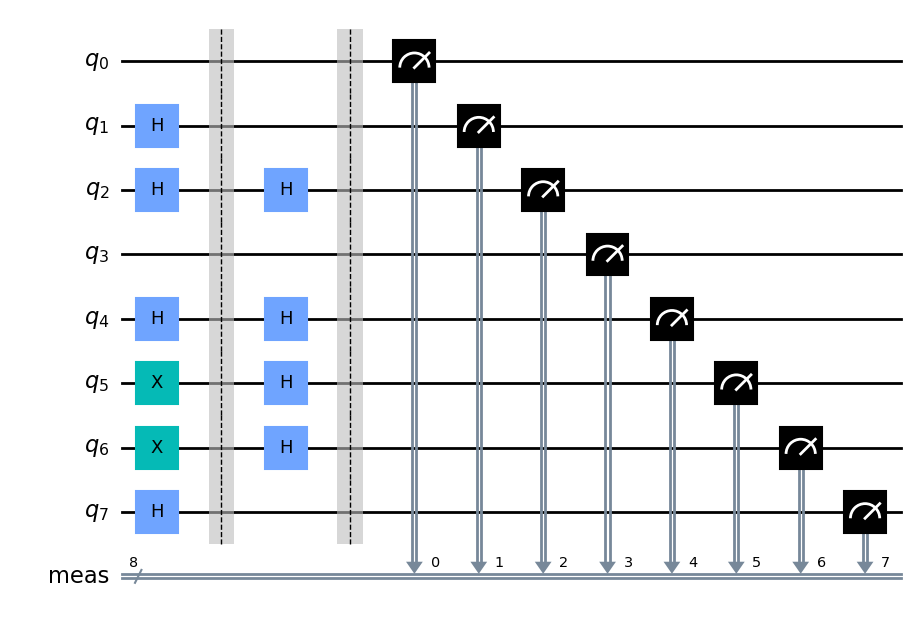

In [118]:
bb84_circuit.draw('mpl')

{'01000000': 1, '00000110': 3, '01000100': 1, '01000001': 1, '01000101': 1, '01000110': 1, '00000000': 1, '00000100': 1}


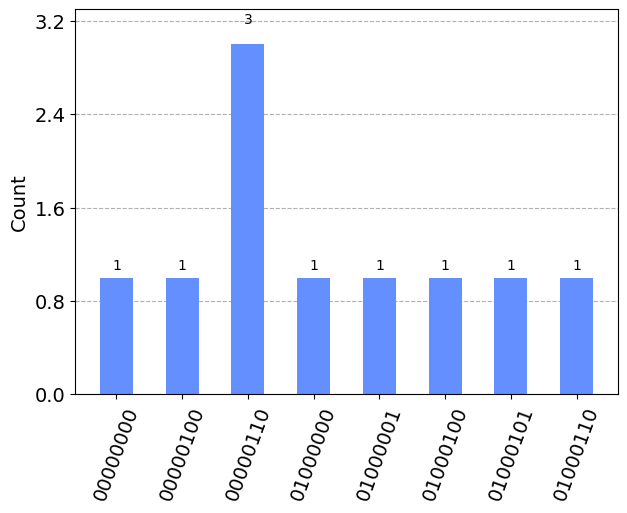

In [119]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(experiments = bb84_circuit.reverse_bits(), backend = backend, shots = 10)    # Shots = 1
results = execution.result()
counts = results.get_counts()

# The counts here are the final qubit values that Bob gets after polarizing the photons through his choice of random basis! 
print(counts)
plot_histogram(counts)


# Quantum Communication through quantum channel ends here!

In [120]:
# Classical communication begins here!
# Creating the KEY!!!

# We need to compare the basis of Alice and Bob (alice_basis and bob_basis)

keys = []
for bob_key in counts:
    possible_key = ''
    for index in range(n_qubits):
        if alice_basis[index] == bob_basis[index]:
            possible_key = possible_key + str(bob_key[index])
        else:
            possible_key = possible_key + '-'
    print(possible_key)

    keys.append(possible_key)

0-000---
0-000---
0-000---
0-000---
0-000---
0-000---
0-000---
0-000---


In [121]:
info=keys[0]
arr_info=[]
for i in info:
    arr_info.append(i)
ans=""
arr=[]
input_key=input("Enter the key")
for i in input_key:
    arr.append(i)

for i in range(0,len(info)):
    if arr_info[i] =="-":
        ans=ans+arr[i]
    else: 
        if arr_info[i] == arr[i]:
            ans = ans+arr[i]
        else:
            ans = ans+"2"
print(ans)
print(arr_info)


00000210
['-', '0', '-', '-', '-', '0', '1', '-']


In [122]:
from AESdecryptfunc import * 
import math 
import io

sys.argv[1]="ciphertext.txt"
sys.argv[2]="plaintext2.txt"

while(len(PassPhrase)!=16):
    print("Enter in the 16 character passphrase to decrypt your text file %s" %sys.argv[1])
    PassPhrase=ans
    if(len(PassPhrase)<16):
        while(len(PassPhrase)!=16):
            PassPhrase=PassPhrase+"\00"
    if(len(PassPhrase)>16):#check if bigger than 16 characters, if so then truncate it to be only 16 chars from [0:16]
        print("Your passphrase was larger than 16, truncating passphrase.")
        PassPhrase=PassPhrase[0:16]

#open ciphertext.txt file to read and decrypt
file=open(sys.argv[1], "r")
message=(file.read())
print("Inside your ciphertext message is:\n%s\n" % message)
file.close()

#set up some parameters
start=0#set starting pointer for the part to decrypt of the ciphertext
end=32#set ending pointer for the part to decrypt of the plaintex
length=len(message)#check the entire size of the message
loopmsg=0.00#create a decimal value
loopmsg=math.ceil(length/32)+1#use formula to figure how long the message is and how many 16 character segments must be decrypted
outputhex=""#setup output message segment in hex
asciioutput=""#setup compilation of output message in ascii

#need to setup roundkeys here
PassPhrase=BitVector(textstring=PassPhrase)
roundkey1=findroundkey(PassPhrase.get_bitvector_in_hex(),1)
roundkey2=findroundkey(roundkey1,2)
roundkey3=findroundkey(roundkey2,3)
roundkey4=findroundkey(roundkey3,4)
roundkey5=findroundkey(roundkey4,5)
roundkey6=findroundkey(roundkey5,6)
roundkey7=findroundkey(roundkey6,7)
roundkey8=findroundkey(roundkey7,8)
roundkey9=findroundkey(roundkey8,9)
roundkey10=findroundkey(roundkey9,10)
roundkeys=[roundkey1,roundkey2,roundkey3,roundkey4,roundkey5,roundkey6,roundkey7,roundkey8,roundkey9,roundkey10]

FILEOUT = io.open(sys.argv[2], 'w', encoding='utf-8')

# set up the segement message loop parameters
for y in range(1, loopmsg): # loop to encrypt all segments of the message
    plaintextseg = message[start:end]

    # add round key
    bv1 = BitVector(hexstring=plaintextseg)
    bv2 = BitVector(hexstring=roundkeys[9])
    resultbv = bv1 ^ bv2
    myhexstring = resultbv.get_bitvector_in_hex()

    #inverse shift row
    myhexstring=invshiftrow(myhexstring)

    #inverse subbyte
    myhexstring=invsubbyte(myhexstring)

    for x in range(8, -1, -1):
        # add roundkey for current round
        bv1 = BitVector(hexstring=myhexstring)
        bv2 = BitVector(hexstring=roundkeys[x])
        resultbv = bv1 ^ bv2
        myhexstring = resultbv.get_bitvector_in_hex()

        # mix column
        bv3 = BitVector(hexstring=myhexstring)
        myhexstring=invmixcolumn(bv3)

        # shift rows
        myhexstring = invshiftrow(myhexstring)

        # sub byte
        myhexstring = invsubbyte(myhexstring)

    #add initial round key
    bv1 = BitVector(hexstring=myhexstring)
    bv2 = PassPhrase
    resultbv = bv1 ^ bv2
    myhexstring = resultbv.get_bitvector_in_hex()

    start = start + 32 #increment start pointer
    end = end + 32 #increment end pointer

    replacementptr = 0
    while (replacementptr < len(myhexstring)):
        if (myhexstring[replacementptr:replacementptr + 2] == '0d'):
            myhexstring = myhexstring[0:replacementptr] + myhexstring[replacementptr+2:len(myhexstring)]
        else:
            replacementptr = replacementptr + 2

    outputhex = BitVector(hexstring=myhexstring)
    asciioutput = outputhex.get_bitvector_in_ascii()
    asciioutput=asciioutput.replace('\x00','')
    FILEOUT.write(asciioutput)

FILEOUT.close()

file2=io.open(sys.argv[2], "r", encoding='utf-8')
print("The decrypted message for the entire ciphertext is:\n%s\n" % file2.read())
file2.close()

Enter in the 16 character passphrase to decrypt your text file ciphertext.txt
Inside your ciphertext message is:
2c6fdb604effc6ba74385a69e9f61240aa34bd9f5c571fc4c85b4d073764597b0c447952ec550a573920a94bfc6d7bc223a961191eb59353c2d57f2798bfa8b85032d23ba73373074f5aa406ca73e4079c583fd2c746b76867d8a4d4239baf96455224df46123c2f582eb1f4829edef042120c64fb8eb03258c31c3cb5271427f27ba17fc822d151620bb68c56decd974a7c579dfc7de91ecc8c10600740c26c6cdc28d1baef40f76e697e7f5b7d10c573f2f51b507f64762d47c7f31ab7e204f8b61533e03ebef96a4d77a4db41ca1d0e8575ad3329f2390e15c3e0563ef603fc0a3f125c3d41dfbe370752e1efa9dbcc1e41b8a613c7ebc1b65b2cc8d6f7be1bc7dfbce1ac61fba090e49a134c51aef8b92b482c4a68112231a3f3de99aa0b603fe32d6076746a45915cf756e1b3610a5201840dee5bc2ccfe81a48a50be03680d84dd4ed08754329a7a2b0c9471750e400dee1e8b252fba16f9324fc40a945526a4946e996a5a283b37576d2e27a97732a1e53493d4ee46ea91185d1a987b5b67360bbaa7e7338128a439dd44979df20d26ad8c4afaa0226c22431c2f9988b2e89aca5cdf747f09ae025cae6453b96a7ceeb5166c826e64db93c